In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Charger les fichiers CSV
# Python
py_rk4 = pd.read_csv("py_rk4.csv", header=None)
py_euler = pd.read_csv("py_euler.csv", header=None)

# C
c_rk4 = pd.read_csv("c_rk4_library.csv", header=None)
c_euler = pd.read_csv("c_euler_manual.csv", header=None)

# Renommer colonnes
cols = ["S", "E", "I", "R"]

for df in [py_rk4, py_euler, c_rk4, c_euler]:
    df.columns = cols

# Axe du temps
t = np.linspace(0, 730, len(py_rk4))


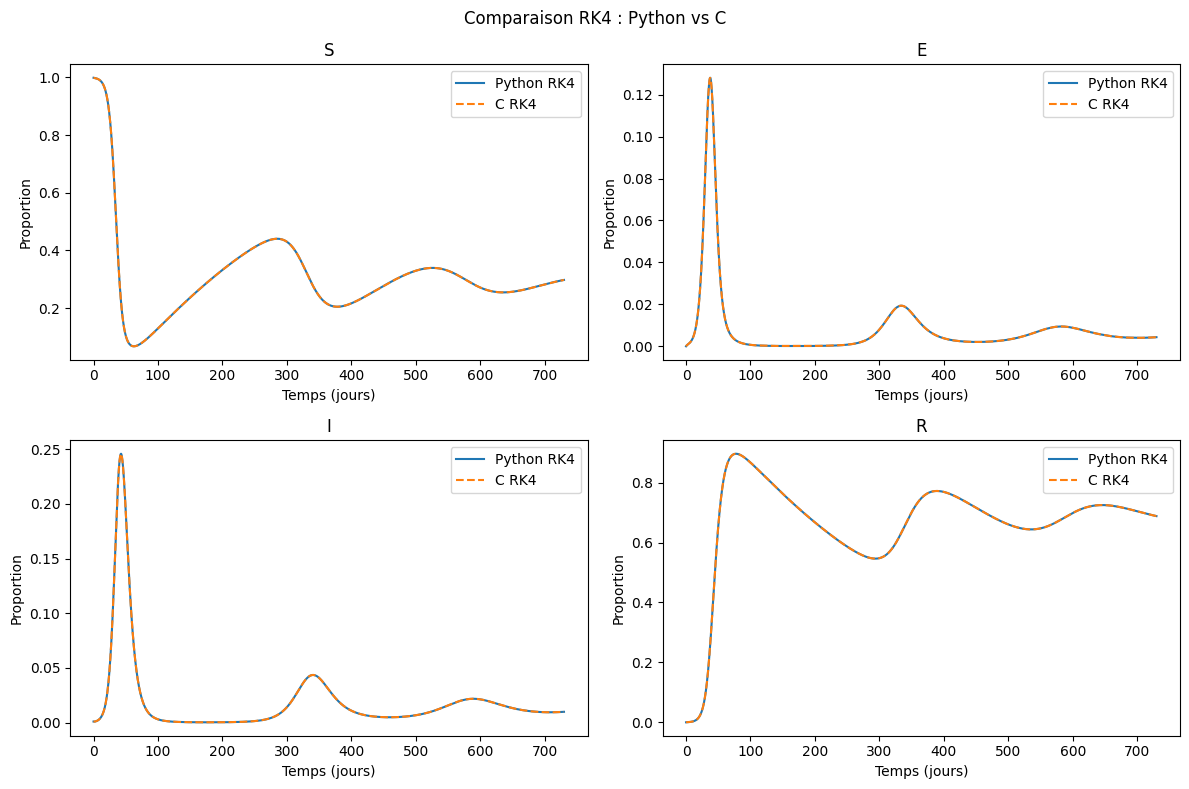

In [12]:
# Comparaison RK4 : Python vs C
plt.figure(figsize=(12,8))

for i, comp in enumerate(cols):
    plt.subplot(2,2,i+1)
    
    plt.plot(t, py_rk4[comp], label="Python RK4")
    plt.plot(t, c_rk4[comp], "--", label="C RK4")
    
    plt.title(comp)
    plt.xlabel("Temps (jours)")
    plt.ylabel("Proportion")
    plt.legend()

plt.suptitle("Comparaison RK4 : Python vs C")
plt.tight_layout()
plt.show()


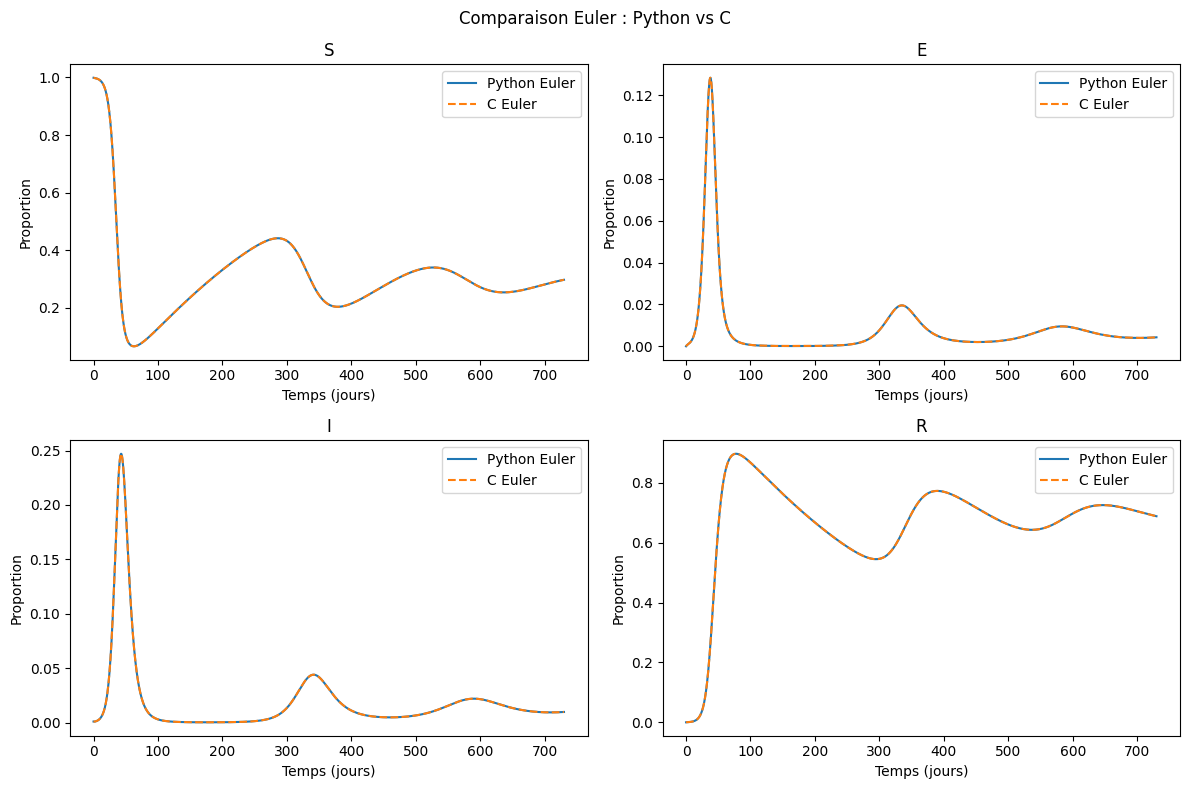

In [13]:
# Comparaison Euler : Python vs C
plt.figure(figsize=(12,8))

for i, comp in enumerate(cols):
    plt.subplot(2,2,i+1)
    
    plt.plot(t, py_euler[comp], label="Python Euler")
    plt.plot(t, c_euler[comp], "--", label="C Euler")
    
    plt.title(comp)
    plt.xlabel("Temps (jours)")
    plt.ylabel("Proportion")
    plt.legend()

plt.suptitle("Comparaison Euler : Python vs C")
plt.tight_layout()
plt.show()


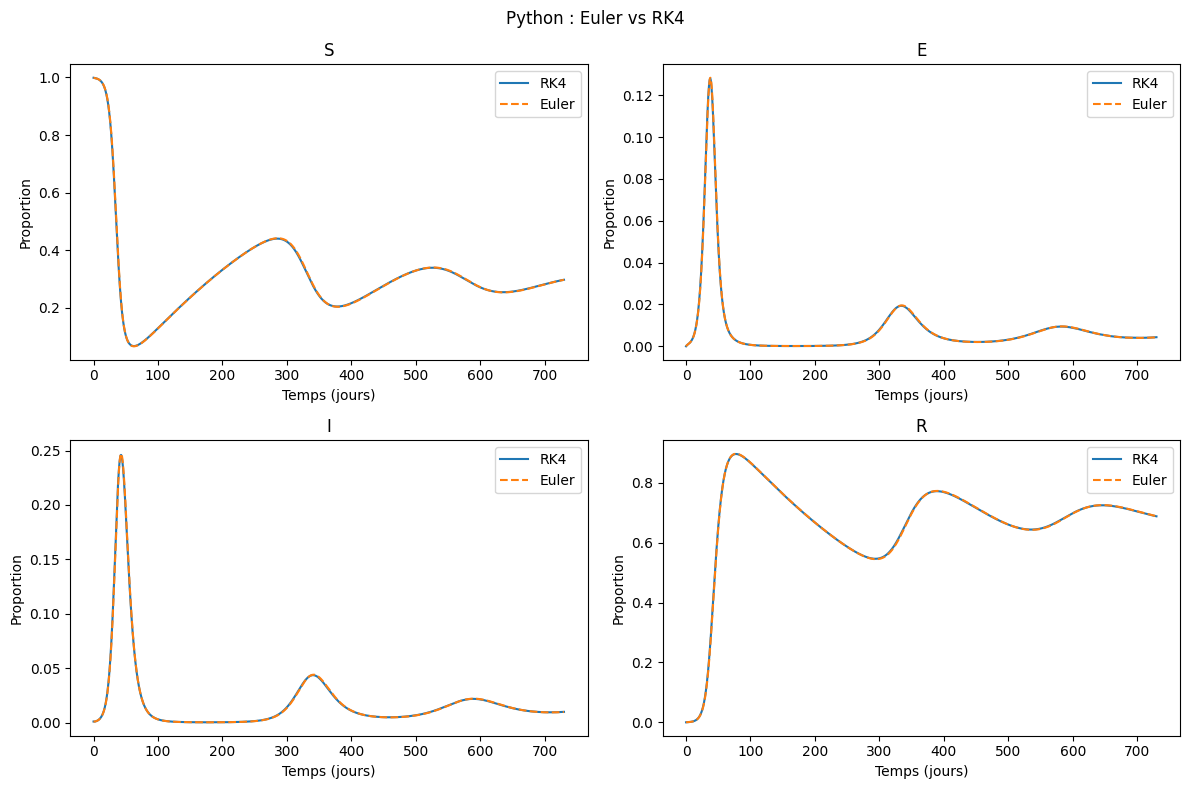

In [14]:
# Comparaison Euler vs RK4 (Python)
plt.figure(figsize=(12,8))

for i, comp in enumerate(cols):
    plt.subplot(2,2,i+1)
    
    plt.plot(t, py_rk4[comp], label="RK4")
    plt.plot(t, py_euler[comp], "--", label="Euler")
    
    plt.title(comp)
    plt.xlabel("Temps (jours)")
    plt.ylabel("Proportion")
    plt.legend()

plt.suptitle("Python : Euler vs RK4")
plt.tight_layout()
plt.show()


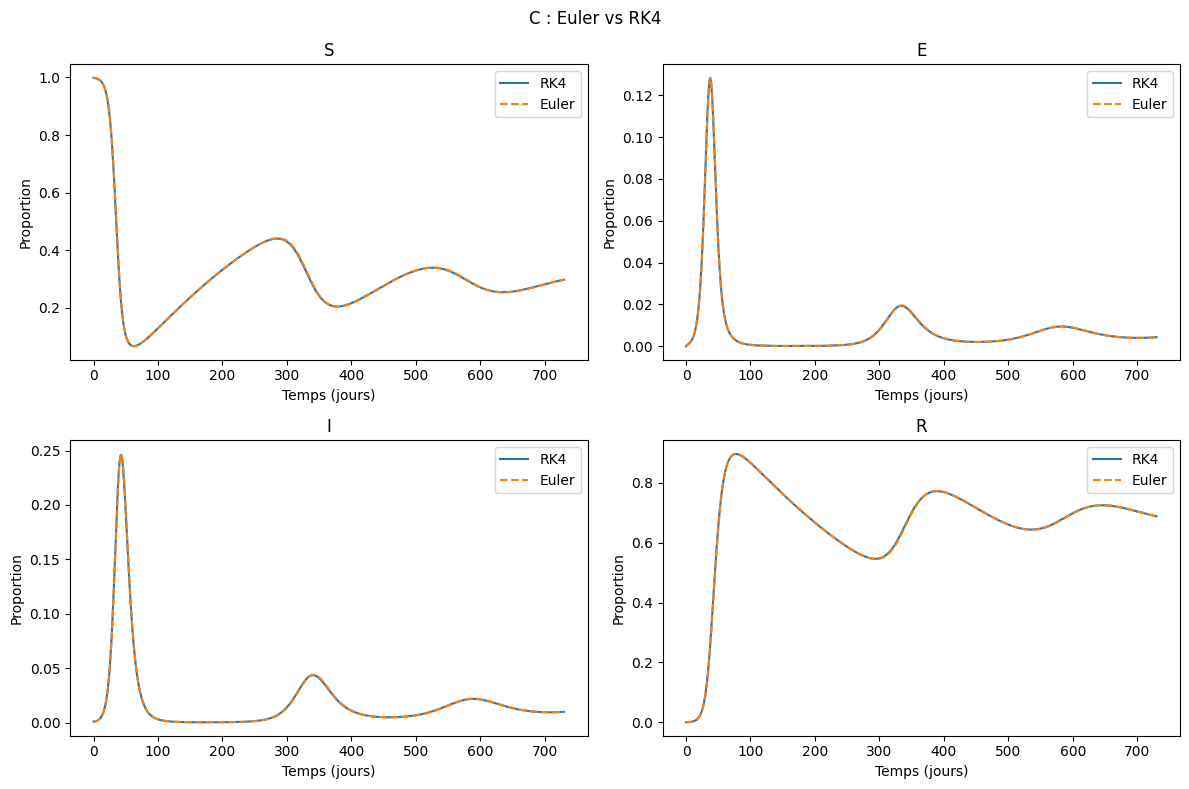

In [16]:
# Comparaison Euler vs RK4 (C)
plt.figure(figsize=(12,8))

for i, comp in enumerate(cols):
    plt.subplot(2,2,i+1)
    
    plt.plot(t, c_rk4[comp], label="RK4")
    plt.plot(t, c_euler[comp], "--", label="Euler")
    
    plt.title(comp)
    plt.xlabel("Temps (jours)")
    plt.ylabel("Proportion")
    plt.legend()

plt.suptitle("C : Euler vs RK4")
plt.tight_layout()
plt.show()


In [18]:
# RK4 Python vs C
diff_rk4 = np.abs(py_rk4 - c_rk4)

print("Erreur maximale RK4 Python vs C :")
print(diff_rk4.max())


Erreur maximale RK4 Python vs C :
S    0.000071
E    0.000151
I    0.000129
R    0.000040
dtype: float64


In [17]:
# Euler Python vs C
diff_euler = np.abs(py_euler - c_euler)

print("Erreur maximale Euler Python vs C :")
print(diff_euler.max())

Erreur maximale Euler Python vs C :
S    4.998391e-07
E    4.999908e-07
I    4.999770e-07
R    4.998517e-07
dtype: float64


In [21]:
# Euler vs RK4 (C)
diff_c = np.abs(c_euler - c_rk4)

print("Erreur maximale Euler vs RK4 (C) :")
print(diff_c.max())

Erreur maximale Euler vs RK4 (C) :
S    0.010912
E    0.002175
I    0.003677
R    0.008575
dtype: float64


In [20]:
# Euler vs RK4 (Python)
diff_py = np.abs(py_euler - py_rk4)

print("Erreur maximale Euler vs RK4 (Python) :")
print(diff_py.max())


Erreur maximale Euler vs RK4 (Python) :
S    0.010938
E    0.002262
I    0.003683
R    0.008611
dtype: float64
